# Exploratory Data Analysis Term Project
    Sadie Harper
    DSC530-T301
    Dr. Parajulee
    6/5/2021

# Import Libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
import seaborn as sns
import random
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

# Load in Data

In [2]:
# Zillow's typical home value for 3 California counties
zhvi = pd.read_csv('Data/ZHVI_county.csv')
zhvi = zhvi[(zhvi['RegionName'] == 'Los Angeles County') | (zhvi['RegionName'] == 'Orange County') | (zhvi['RegionName'] == 'Ventura County')]
zhvi = zhvi[(zhvi['State'] == 'CA')]
zhvi.reset_index(inplace=True)
zhvi = zhvi.filter(items=['RegionName', '1/31/2014', '1/31/2015'])
zhvi.head()

,RegionName,1/31/2014,1/31/2015
0,Los Angeles County,884994.0,909913.0
1,Orange County,972798.0,972941.0
2,Ventura County,740544.0,752544.0


In [3]:
# Calulate percent change from Jan 2014 to Jan 2015
zhvi['pct_chg'] = 100 * ((zhvi['1/31/2015'] - zhvi['1/31/2014']) / zhvi['1/31/2014'])
zhvi.columns = ['fips', '2014', '2015', 'pct_change']
zhvi.head()

,fips,2014,2015,pct_change
0,Los Angeles County,884994.0,909913.0,2.815725
1,Orange County,972798.0,972941.0,0.014700
2,Ventura County,740544.0,752544.0,1.620430


In [4]:
# 2016 property data
properties_2016 = pd.read_csv('Data/properties_2016.csv')
properties_2016.head()

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
# 2017 property data
properties_2017 = pd.read_csv('Data/properties_2017.csv')
properties_2017.head()

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [6]:
# Concat 2016 and 2017 properties into one dataframe
property_df = [properties_2016, properties_2017]
properties = pd.concat(property_df)
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


# Exploratory Analysis

In [7]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970434 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [8]:
# Rename columns - definitions from dictionary file on source of data
properties.columns = ['parcel_id', 'air_conditioning', 'architectural_style', 'area_basement', 'num_bathroom', 'num_bedroom', 
                      'building_class', 'building_quality','num_bathroom_calc', 'deck_type', 'area_living_finished_floor1', 
                      'area_living_finished_total', 'area_total_finished', 'area_perimeter', 'area_total', 
                      'area_living_finished_floor1_50', 'area_base', 'fips', 'num_fireplace', 'num_full_bath', 'num_garage', 
                      'area_garage', 'spa_flag', 'heating', 'latitude', 'longitude', 'area_lot', 'num_pool', 'area_pool', 
                      'spa_only', 'spa_pool', 'pool_only', 'zone_country', 'zoning', 'allowed_zoning', 'census_raw', 'city_id', 
                      'county_id', 'neighborhood_id', 'zip_id', 'num_room', 'stories', 'num_3/4_bath', 'construction_type', 
                      'num_units', 'area_patio', 'area_shed', 'year_built', 'num_stories', 'fireplace_flag', 'tax_building', 
                      'tax_total', 'tax_year', 'tax_land', 'tax_property', 'tax_delinquency_flag','tax_delinquency_year','census']

In [9]:
# Drop duplicate values
properties.drop_duplicates(inplace=True)

In [10]:
# Check the missing values
properties.isnull().sum().sort_values()

parcel_id                               0
fips                                14369
zoning                              14369
census_raw                          14369
county_id                           14369
longitude                           14369
latitude                            14369
tax_year                            14371
num_bedroom                         14382
num_bathroom                        14394
num_room                            14407
zone_country                        15274
zip_id                              25346
tax_property                        51560
tax_total                           76511
area_living_finished_total          99576
tax_building                       100388
year_built                         106706
city_id                            123581
tax_land                           127132
census                             148126
num_full_bath                      244564
num_bathroom_calc                  244564
area_total_finished               

In [11]:
# Filter to only single family homes
properties = properties[(properties['zoning'] == 261)]

In [12]:
# Choose final features based on least missing values and available definitions
property_features = properties.filter(items=['parcel_id', 'tax_total', 'fips', 'num_bedroom', 'num_bathroom', 
                                             'tax_delinquency_flag', 'area_living_finished_total','area_lot'])
# Recode fips from code to county name
property_features.loc[(property_features.fips == 6037.0), 'fips'] = 'Los Angeles County'
property_features.loc[(property_features.fips == 6059.0), 'fips'] = 'Orange County'
property_features.loc[(property_features.fips == 6111.0), 'fips'] = 'Ventura County'
property_features['fips'].value_counts()

Los Angeles County    2860195
Orange County         1107791
Ventura County         331248
Name: fips, dtype: int64

In [13]:
# Merge  property and typical home value data
property_df = pd.merge(property_features, zhvi, how = 'left', on = 'fips')
property_df.drop(['2014', '2015'], inplace=True, axis=1)
property_df.head()

,parcel_id,tax_total,fips,num_bedroom,num_bathroom,tax_delinquency_flag,area_living_finished_total,area_lot,pct_change
0,10759547,27516.0,Los Angeles County,0.0,0.0,NaN,NaN,4083.0,2.815725
1,11193347,10.0,Los Angeles County,0.0,0.0,NaN,NaN,11975.0,2.815725
2,11215747,10.0,Los Angeles County,0.0,0.0,NaN,NaN,9403.0,2.815725
3,11229347,2077.0,Los Angeles County,0.0,0.0,NaN,NaN,3817.0,2.815725
4,11324547,291973.0,Los Angeles County,4.0,2.0,NaN,3633.0,9826.0,2.815725


In [14]:
# Describe the data
round(property_df.describe(include='all'))

,parcel_id,tax_total,fips,num_bedroom,num_bathroom,tax_delinquency_flag,area_living_finished_total,area_lot,pct_change
count,4299234.0,4298258.0,4299234,4299223.0,4299223.0,82391,4281255.0,4273470.0,4299234.0
unique,NaN,NaN,3,NaN,NaN,1,NaN,NaN,NaN
top,NaN,NaN,Los Angeles County,NaN,NaN,Y,NaN,NaN,NaN
freq,NaN,NaN,2860195,NaN,NaN,82391,NaN,NaN,NaN
mean,13018373.0,449682.0,NaN,3.0,2.0,NaN,1861.0,11184.0,2.0
std,3996716.0,675874.0,NaN,1.0,1.0,NaN,1219.0,321108.0,1.0
min,10711725.0,1.0,NaN,0.0,0.0,NaN,1.0,100.0,0.0
25%,11658637.0,183720.0,NaN,3.0,2.0,NaN,1256.0,5635.0,0.0
50%,12596987.0,319798.0,NaN,3.0,2.0,NaN,1621.0,6760.0,3.0
75%,14054451.0,520802.0,NaN,4.0,3.0,NaN,2205.0,8550.0,3.0


# Histograms

C:\tools\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\tools\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


count     4298258.0
mean       449682.0
std        675874.0
min             1.0
25%        183720.0
50%        319798.0
75%        520802.0
max      98428909.0
Name: tax_total, dtype: float64
Spread: 98428908.0


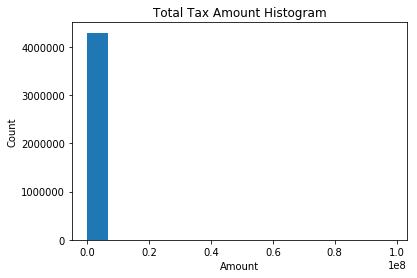

In [15]:
# Total tax amount
plt.hist(property_df['tax_total'], bins=15)
plt.title('Total Tax Amount Histogram')
plt.xlabel('Amount')
plt.ylabel('Count')
print(round(property_df['tax_total'].describe()))
minn = property_df['tax_total'].min()
maxx = property_df['tax_total'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# There are very high outliers here that need to be removed

count    4299223.0
mean           3.0
std            1.0
min            0.0
25%            3.0
50%            3.0
75%            4.0
max           25.0
Name: num_bedroom, dtype: float64
Spread: 25.0


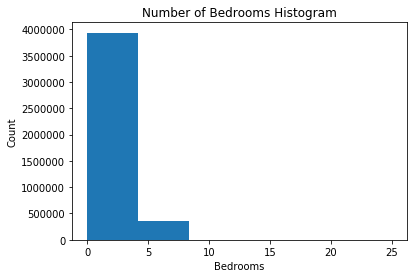

In [16]:
# Number of bedrooms
plt.hist(property_df['num_bedroom'],bins=6)
plt.title('Number of Bedrooms Histogram')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
print(round(property_df['num_bedroom'].describe()))
minn = property_df['num_bedroom'].min()
maxx = property_df['num_bedroom'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# There are outliers with the high number of bedrooms that should be removed

count    4299223.0
mean           2.0
std            1.0
min            0.0
25%            2.0
50%            2.0
75%            3.0
max           32.0
Name: num_bathroom, dtype: float64
Spread: 32.0


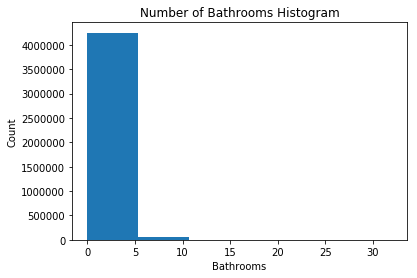

In [17]:
# Number of bathrooms
plt.hist(property_df['num_bathroom'],bins=6)
plt.title('Number of Bathrooms Histogram')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
print(round(property_df['num_bathroom'].describe()))
minn = property_df['num_bathroom'].min()
maxx = property_df['num_bathroom'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# Similar to the number of bedrooms, the number of bathrooms have high outliers skewing the
# distribution

count    4281255.0
mean        1861.0
std         1219.0
min            1.0
25%         1256.0
50%         1621.0
75%         2205.0
max       952576.0
Name: area_living_finished_total, dtype: float64
Spread: 952575.0


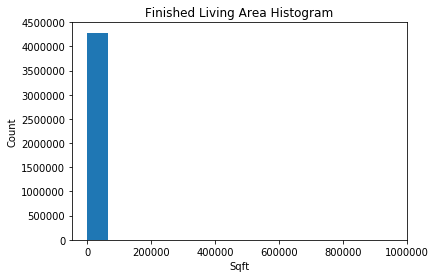

In [18]:
# Finished living area sqft 
plt.hist(property_df['area_living_finished_total'], bins=15)
plt.title('Finished Living Area Histogram')
plt.xlabel('Sqft')
plt.ylabel('Count')
print(round(property_df['area_living_finished_total'].describe()))
minn = property_df['area_living_finished_total'].min()
maxx = property_df['area_living_finished_total'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# The outliers are so high all other values are put into one bin, I will remove these

count      4273470.0
mean         11184.0
std         321108.0
min            100.0
25%           5635.0
50%           6760.0
75%           8550.0
max      371000512.0
Name: area_lot, dtype: float64
Spread: 371000412.0


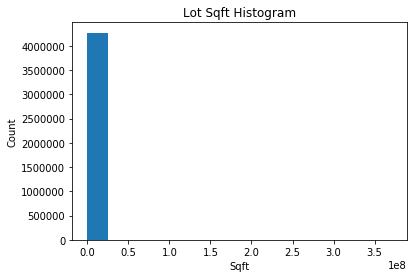

In [19]:
# Lot sqft
plt.hist(property_df['area_lot'], bins=15)
plt.title('Lot Sqft Histogram')
plt.xlabel('Sqft')
plt.ylabel('Count')
print(round(property_df['area_lot'].describe()))
minn = property_df['area_lot'].min()
maxx = property_df['area_lot'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# The outliers are causing a positive skew in the distribution of all my varaibles

In [20]:
# Filters to remove outliers and make data more representative of typical single family homes
property_df = property_df[property_df['tax_total'] <= 1500000.0]
property_df = property_df[property_df['tax_total'] >= 1000.0]
property_df = property_df[property_df['num_bedroom'] < 7.0]
property_df = property_df[property_df['num_bedroom'] > 0.0]
property_df = property_df[property_df['num_bathroom'] < 6.0]
property_df = property_df[property_df['num_bathroom'] > 0.0]
property_df = property_df[property_df['area_living_finished_total'] <= 4500.0]
property_df = property_df[property_df['area_living_finished_total'] >= 500.0]
property_df = property_df[property_df['area_lot'] <= 30000.0]
round(property_df.describe())

,parcel_id,tax_total,num_bedroom,num_bathroom,area_living_finished_total,area_lot,pct_change
count,3991174.0,3991174.0,3991174.0,3991174.0,3991174.0,3991174.0,3991174.0
mean,12975086.0,365564.0,3.0,2.0,1739.0,7486.0,2.0
std,2822099.0,260421.0,1.0,1.0,681.0,3675.0,1.0
min,10711725.0,1312.0,1.0,0.0,500.0,104.0,0.0
25%,11702590.0,179211.0,3.0,2.0,1243.0,5575.0,0.0
50%,12619288.0,307660.0,3.0,2.0,1585.0,6653.0,3.0
75%,14052071.0,484580.0,4.0,3.0,2096.0,8110.0,3.0
max,168183614.0,1500000.0,6.0,6.0,4500.0,30000.0,3.0


## Histograms after removing the outliers

count    3991174.0
mean      365564.0
std       260421.0
min         1312.0
25%       179211.0
50%       307660.0
75%       484580.0
max      1500000.0
Name: tax_total, dtype: float64
Spread: 1498688.0


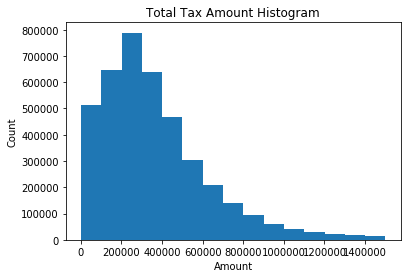

In [21]:
# Total tax amount
plt.hist(property_df['tax_total'], bins=15)
plt.title('Total Tax Amount Histogram')
plt.xlabel('Amount')
plt.ylabel('Count')
print(round(property_df['tax_total'].describe()))
minn = property_df['tax_total'].min()
maxx = property_df['tax_total'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# The distribution is still positively skewed but it is much better than before.

count    3991174.0
mean           3.0
std            1.0
min            1.0
25%            3.0
50%            3.0
75%            4.0
max            6.0
Name: num_bedroom, dtype: float64
Spread: 5.0


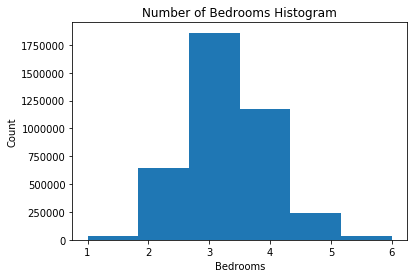

In [22]:
# Number of bedrooms
plt.hist(property_df['num_bedroom'],bins=6)
plt.title('Number of Bedrooms Histogram')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
print(round(property_df['num_bedroom'].describe()))
minn = property_df['num_bedroom'].min()
maxx = property_df['num_bedroom'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# The number of bedrooms has a much more normal distribution after removing outliers

count    3991174.0
mean           2.0
std            1.0
min            0.0
25%            2.0
50%            2.0
75%            3.0
max            6.0
Name: num_bathroom, dtype: float64
Spread: 5.0


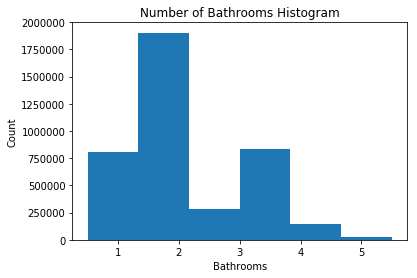

In [23]:
# Number of bathrooms
plt.hist(property_df['num_bathroom'],bins=6)
plt.title('Number of Bathrooms Histogram')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
print(round(property_df['num_bathroom'].describe()))
minn = property_df['num_bathroom'].min()
maxx = property_df['num_bathroom'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# There are almost two peaks here but not quite. This isn't a normal distribution but the 
# heavy skew is gone since the outliers have been removed.

count    3991174.0
mean        1739.0
std          681.0
min          500.0
25%         1243.0
50%         1585.0
75%         2096.0
max         4500.0
Name: area_living_finished_total, dtype: float64
Spread: 4000.0


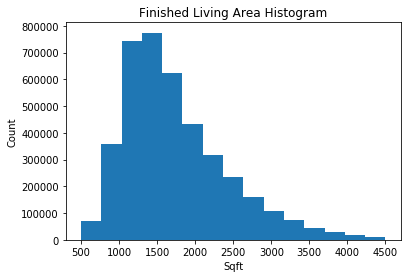

In [24]:
# Finished living area sqft 
plt.hist(property_df['area_living_finished_total'], bins=15)
plt.title('Finished Living Area Histogram')
plt.xlabel('Sqft')
plt.ylabel('Count')
print(round(property_df['area_living_finished_total'].describe()))
minn = property_df['area_living_finished_total'].min()
maxx = property_df['area_living_finished_total'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# Still a positively skewed distribution but not as heavy.

count    3991174.0
mean        7486.0
std         3675.0
min          104.0
25%         5575.0
50%         6653.0
75%         8110.0
max        30000.0
Name: area_lot, dtype: float64
Spread: 29896.0


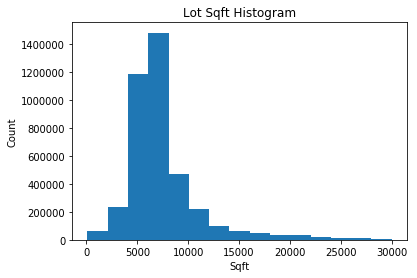

In [25]:
# Lot sqft
plt.hist(property_df['area_lot'], bins=15)
plt.title('Lot Sqft Histogram')
plt.xlabel('Sqft')
plt.ylabel('Count')
print(round(property_df['area_lot'].describe()))
minn = property_df['area_lot'].min()
maxx = property_df['area_lot'].max()
spread = maxx - minn
print('Spread: %s' %spread)
# The tails drop off quickly from the peak and there is still a positive skew.

# PMF

In [26]:
# Split lot sqft data by county
la_property = property_df[property_df['fips'] == 'Los Angeles County']
la_area = la_property.area_living_finished_total
la_area_dropna = la_area.dropna()
print('Los Angeles', len(la_area), len(la_area_dropna))

o_property = property_df[property_df['fips'] == 'Orange County']
o_area = o_property.area_living_finished_total
o_area_dropna = o_area.dropna()
print('Orange', len(o_area), len(o_area_dropna))

v_property = property_df[property_df['fips'] == 'Ventura County']
v_area = v_property.area_living_finished_total
v_area_dropna = v_area.dropna()
print('Ventura', len(v_area), len(v_area_dropna))

la_pmf2 = thinkstats2.Pmf(la_area_dropna, label = 'Los Angeles County')
o_pmf2 = thinkstats2.Pmf(v_area_dropna, label = 'Orange County')
v_pmf2 = thinkstats2.Pmf(v_area_dropna, label = 'Ventura County')

Los Angeles 2645307 2645307
Orange 1042342 1042342
Ventura 303525 303525


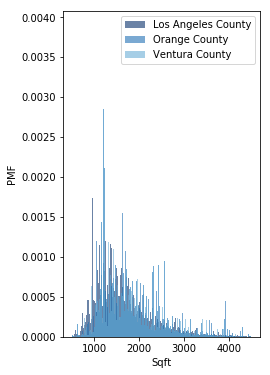

In [27]:
# PMF 
width = 1
thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(la_pmf2, align='right', width=width)
thinkplot.Hist(o_pmf2, width=width)
thinkplot.Hist(v_pmf2, align='left', width=width)
thinkplot.Config(xlabel='Sqft', ylabel='PMF')

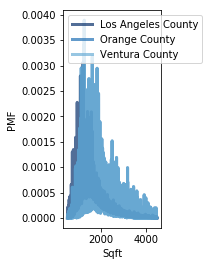

<Figure size 576x432 with 0 Axes>

In [28]:
# PMF
thinkplot.PrePlot(3)
thinkplot.SubPlot(3)
thinkplot.Pmfs([la_pmf2, o_pmf2, v_pmf2])
thinkplot.Show(xlabel='Sqft', ylabel= 'PMF', loc='upper left')

# CDF

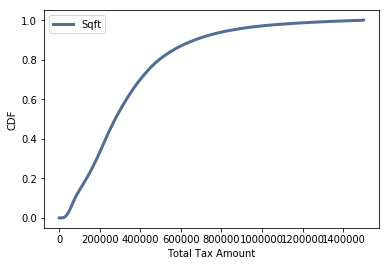

In [29]:
# CDF of total tax amount
cdf = thinkstats2.Cdf(la_property.tax_total, label='Sqft')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Total Tax Amount', ylabel='CDF', loc='upper left')

In [30]:
# CDF of $300,000 
cdf.Prob(300000) * 100

54.442905870660766

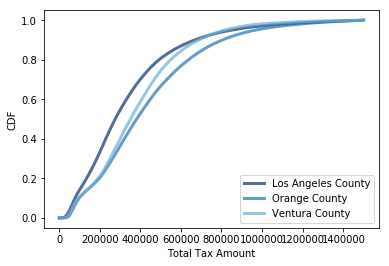

In [31]:
# CDF of total tax amount by county
la_cdf = thinkstats2.Cdf(la_property.tax_total, label='Los Angeles County')
o_cdf = thinkstats2.Cdf(o_property.tax_total, label='Orange County')
v_cdf = thinkstats2.Cdf(v_property.tax_total, label='Ventura County')
thinkplot.PrePlot(3)
thinkplot.Cdfs([la_cdf, o_cdf, v_cdf])
thinkplot.Config(xlabel='Total Tax Amount', ylabel='CDF', loc='lower right')

# Analytical Distribution

## Lognormal Distribution

In [32]:
def MakeNormalModel(tax):
    """Plots a CDF with a Normal model."""
    cdf = thinkstats2.Cdf(tax, label='Taxes')

    mean, var = thinkstats2.TrimmedMeanVar(tax)
    std = np.sqrt(var)
    print('n, mean, std', len(tax), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='Model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 3991174 358751.6427644456 240147.21228352218


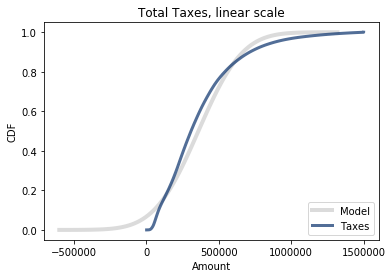

In [33]:
tax = property_df.tax_total
MakeNormalModel(tax)
thinkplot.Config(title='Total Taxes, linear scale', xlabel='Amount',
                 ylabel='CDF', loc='lower right')
# Total tax amount is not a good fit of the linear scale

n, mean, std 3991174 5.447686310864098 0.3265058590070851


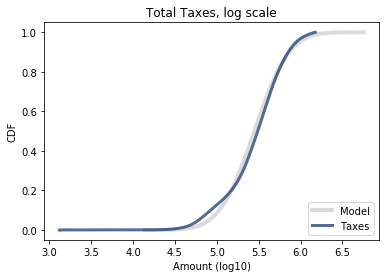

In [34]:
log_tax = np.log10(tax)
MakeNormalModel(log_tax)
thinkplot.Config(title='Total Taxes, log scale', xlabel='Amount (log10)',
                 ylabel='CDF', loc='lower right')
# Total tax amount is a fairly good fit to the log scale
# The top right tail is where it doesn't fit and this is likely because the heavy skew of
# fewer properties paying higher amounts of total taxes

## Probability Plot

In [35]:
def MakeNormalPlot(tax):
    """Generates a normal probability plot."""
    mean, var = thinkstats2.TrimmedMeanVar(tax, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='Model')

    xs, ys = thinkstats2.NormalProbability(tax)
    thinkplot.Plot(xs, ys, label='Taxes')

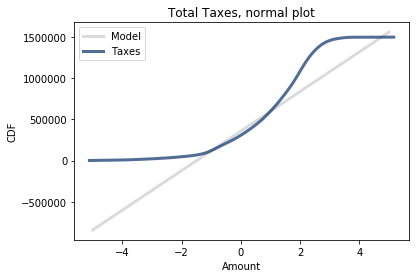

In [36]:
MakeNormalPlot(tax)
thinkplot.Config(title='Total Taxes, normal plot', xlabel='Amount',
                 ylabel='CDF', loc='upper left')
# This reinforces that it is not a good fit for the normal plot

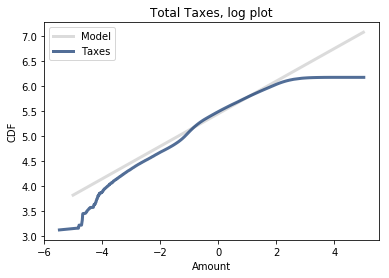

In [37]:
MakeNormalPlot(log_tax)
thinkplot.Config(title='Total Taxes, log plot', xlabel='Amount',
                 ylabel='CDF', loc='upper left')
# The middle section fits the log plot well but the tails drop off
# Here I can see that the bottom tail is worse of a fit than I initially saw from the previous plot

# Scatter Plots

Text(0, 0.5, 'Sqft')

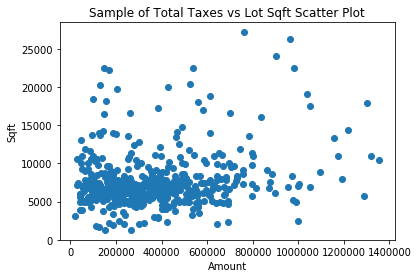

In [38]:
# Generate random samples for scatter plots
indices = np.random.choice(property_df.index, 500, replace=False)
sample = property_df.loc[indices]
sample_tax = sample.tax_total
sample_lot = sample.area_lot
sample_living = sample.area_living_finished_total
sample_bedrooms = sample.num_bedroom

plt.scatter(sample_tax, sample_lot)
plt.title('Sample of Total Taxes vs Lot Sqft Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Sqft')
# This shows that total tax amount and lot sqft do not have a strong relationship. 
# For the relationship that is there, it does appear to be somewhat linear. 

Text(0, 0.5, 'Sqft')

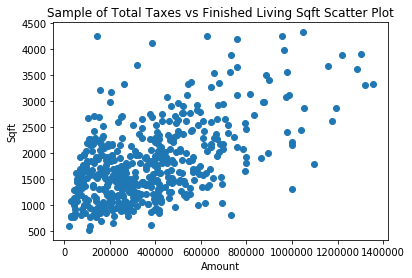

In [39]:
plt.scatter(sample_tax, sample_living)
plt.title('Sample of Total Taxes vs Finished Living Sqft Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Sqft')
# Total tax amount and finished living sqft have what looks to be a slightly stronger relationship 
# than total taxes had with lot sqft, overall a slightly strong relationsip. 
# There is a positive linear relationship. 

Text(0, 0.5, 'Bedrooms')

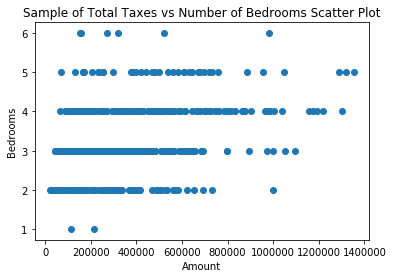

In [40]:
plt.scatter(sample_tax, sample_bedrooms)
plt.title('Sample of Total Taxes vs Number of Bedrooms Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Bedrooms')
# Number of bedrooms and total tax amount do not make an ideal scatter plot so 
# I will jitter the data and plot it again.

In [41]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

Text(0, 0.5, 'Bedrooms')

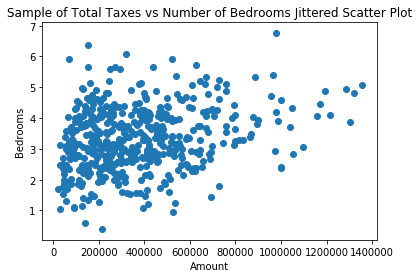

In [42]:
# Jittered scatter plot
sample_tax_j = Jitter(sample_tax)
sample_bedrooms_j = Jitter(sample_bedrooms) 
plt.scatter(sample_tax_j, sample_bedrooms_j)
plt.title('Sample of Total Taxes vs Number of Bedrooms Jittered Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Bedrooms')
# There appears to be no strong relationship between total tax amount and number of bedrooms.

## Covariance

In [43]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [44]:
Cov(sample_tax, sample_lot)
# This covariance between total tax and lot size is large because the sample lot numbers are 
# quite large. The covariance on it's own is hard to interpret

194777065.32666403

In [45]:
Cov(sample_tax, sample_living)
# This covariance between total tax and lot size is large because the sample lot numbers are 
# quite large. The covariance on it's own is hard to interpret

100661153.80985199

In [46]:
Cov(sample_tax, sample_bedrooms)
# The covariance between total tax and the number of bedrooms is much smaller than the previous value
# with lot size because the number of bedrooms are much smaller numbers

72335.76521200001

## Pearson's Correlation

In [47]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [48]:
Corr(sample_tax, sample_lot)
# ~ 0.21 is not that strong of a relationship

0.21473093907288443

In [49]:
Corr(sample_tax, sample_living)
# ~ 0.55 is a somewhat strong relationship

0.551780313230698

In [50]:
Corr(sample_tax, sample_bedrooms)
# ~ 0.32 is not that a slightly strong relationship

0.3192412099690692

## Spearman's Correlation

In [51]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [52]:
SpearmanCorr(sample_tax, sample_lot)
# ~ 0.11 is not that strong, the least of all the tests done actually.

0.10939705319742044

In [53]:
SpearmanCorr(sample_tax, sample_living)
# ~ 0.46 is a somewhat strong relationship

0.4562831323444205

In [54]:
SpearmanCorr(sample_tax, sample_bedrooms)
# ~ 0.31 is again, just barely a slightly strong relationship

0.30940616855508674

# Hypothesis Test

## Means

In [55]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [56]:
# LA County
data1 = la_property.tax_total.values, o_property.tax_total.values
ht = DiffMeansPermute(data1)
pvalue = ht.PValue()
pvalue
# 0 means we expect to see a difference as big as the observed difference 0% of the time
# This is statistically significant

0.0

In [57]:
# Ventura County
data2 = la_property.tax_total.values, v_property.tax_total.values
ht = DiffMeansPermute(data2)
pvalue = ht.PValue()
pvalue
# 0 means we expect to see a difference as big as the observed difference 0% of the time
# This is statistically significant

0.0

In [58]:
# Orange County
data3 = v_property.tax_total.values, o_property.tax_total.values
ht = DiffMeansPermute(data3)
pvalue = ht.PValue()
pvalue
# 0 means we expect to see a difference as big as the observed difference 0% of the time
# This is statistically significant

0.0

# Regression Analysis

## Linear Least Squares 

In [59]:
def LeastSquares(xs, ys):
    '''Computes the intercept and 
    slope of the least squares fit.'''
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [60]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [61]:
inter, slope = LeastSquares(sample_tax, sample_lot)
inter, slope

(6489.523095512282, 0.0030990293613413263)

In [62]:
tax_mean = sample_tax.mean()
inter + slope * tax_mean
# 7638 sqft is the mean lot size for a property paying the $370,591.17 in total taxes

7637.996

In [63]:
print('Slope: %s' %slope)
print('Mean total tax: %s' %tax_mean)
# The slope is a 0.0031 sqft lot size increase with each increase in total tax amount

Slope: 0.0030990293613413263
Mean total tax: 370591.166


In [64]:
fit_xs, fit_ys = FitLine(sample_tax, inter, slope)

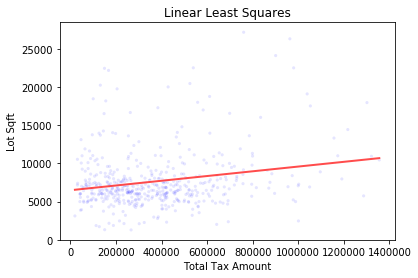

In [65]:
thinkplot.Scatter(sample_tax, sample_lot, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Total Tax Amount",
                 ylabel='Lot Sqft',
                 title='Linear Least Squares',
                 legend=False)

## Residuals

In [66]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [67]:
sample['residual'] = Residuals(sample_tax, sample_lot, inter, slope)
sample.head()

,parcel_id,tax_total,fips,num_bedroom,num_bathroom,tax_delinquency_flag,area_living_finished_total,area_lot,pct_change,residual
3758052,12834254,139738.0,Los Angeles County,4.0,2.0,NaN,1080.0,6001.0,2.815725,-921.575260
668823,11413803,282700.0,Los Angeles County,3.0,2.0,NaN,1018.0,6012.0,2.815725,-1353.618696
2587275,14110747,292019.0,Orange County,3.0,2.0,NaN,1304.0,4802.0,0.014700,-2592.498551
4103346,14008260,369857.0,Orange County,3.0,1.0,NaN,1029.0,7200.0,0.014700,-435.720798
4277292,17144542,900711.0,Ventura County,4.0,4.0,NaN,3404.0,24119.0,1.620430,14838.147069


In [68]:
bins = np.arange(250000, 500000, 25000)
indices = np.digitize(property_df.tax_total, bins)
groups = property_df.groupby(indices)
tax_mean = [group.tax_total.mean() for _, group in groups][1:-1]
tax_mean

[262357.79989703017,
 287336.5163132577,
 312298.6139151701,
 337352.4531799064,
 362159.02222165593,
 387190.6471404794,
 412243.25937360484,
 437090.06316597253,
 462010.51362090034]

In [69]:
cdfs = [thinkstats2.Cdf(sample.residual) for _, group in groups][1:-1]

In [70]:
def PlotPercentiles(tax_mean, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(tax_mean, percentiles, label=label)

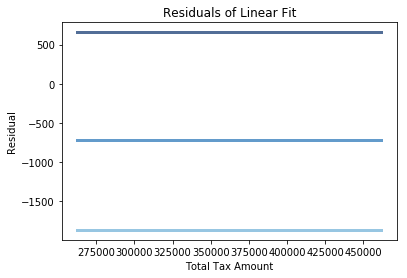

In [71]:
PlotPercentiles(tax_mean, cdfs)

thinkplot.Config(xlabel="Total Tax Amount",
                 ylabel='Residual',
                title='Residuals of Linear Fit')
# These flat lines indicate the residuals are random and variance is the same across
# the groups - also that this model is a good fit for the data and the linear relationship
# is okay to use

## Coefficient of Determination

In [72]:
def CoefDetermination(ys, res):
    return 1 - Var(res) / Var(ys)

In [73]:
inter, slope = LeastSquares(sample_lot, sample_tax)
res = Residuals(sample_lot, sample_tax, inter, slope)
r2 = CoefDetermination(sample_tax, res)
r2
# This R squared means that the lot size predicts around 4.6% of the variance in total tax amount.

0.046109376195122787

In [74]:
# Confirm r squared equals p squared
print('rho', thinkstats2.Corr(sample_tax, sample_lot))
print('R', np.sqrt(r2))   

rho 0.21473093907288443
R 0.21473093907288437


In [75]:
property_df.to_csv('property_df_SHarper.csv')